In [56]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [57]:
os.getcwd()

'C:\\Users\\rasheen1\\Documents\\Data Science\\Intro to Data Science in Python - Coursera'

In [58]:
energy = pd.read_excel("Energy+Indicators.xls", header=17, skip_footer=38, usecols ='C:F',\
                       names = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'] \
                     ,na_values={"np.NAN":"NAN"}  )
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650


In [59]:
#energy['Energy Supply'].isnull()
#energy.loc[energy['Country'].isnull(), ['Country']]
energy['Energy Supply'] = energy['Energy Supply']*1000000
energy.Country[energy.Country.str[-1].str.isdigit()] # Character with digits at the end

11                                            Australia1
42                                                China2
43       China, Hong Kong Special Administrative Region3
44           China, Macao Special Administrative Region4
58                                              Denmark5
73                                               France6
83                                            Greenland7
97                                            Indonesia8
103                                               Italy9
105                                              Japan10
111                                             Kuwait11
143                                        Netherlands12
161                                           Portugal13
177                                       Saudi Arabia14
179                                             Serbia15
190                                              Spain16
197                                        Switzerland17
212                            

In [60]:
# Remove spaces from Country name to check for digits
energy['CountryWithoutSpaces'] = energy['Country'].str.replace(" ","")
energy['Country'] = energy['Country'].str.replace('\d+', '') # Remove Digits from Strings in Dataframe column

In [61]:
energy['Country'] = energy.Country.apply(lambda x: x.replace(r"\(.*\)",''))
energy.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong Special Administrative Region',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Kore

In [62]:
t = energy.CountryWithoutSpaces.apply(lambda x: (x.isalpha())) # alphabetic characters
t1 = ~t
energy.Country[t1] # non alpha characters in the name
energy["Country"] = energy["Country"].str.replace(r"\(.*?\)", "") # replace paranthesis and data within by empty ""

In [63]:
energy.Country.replace(to_replace = ["...", "Republic of Korea",
"United States of America", "United Kingdom of Great Britain and Northern Ireland",
"China, Hong Kong Special Administrative Region"],\
                       value = [np.NaN, "South Korea", "United States", "United Kingdom", "Hong Kong"], inplace=True)

In [64]:
# one metod to remove spaces
from string import digits
original = '1hell4how2 '
remove_digits = str.maketrans('', '', digits)
res = original.translate(remove_digits)
res


'hellhow '

In [65]:
energy.Country = energy.Country.str.strip()
energy.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Hong Kong',
       'China, Macao Special Administrative Region', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
      

In [66]:
# Same excercise for other column to identify other illegal characters
energy["CountryWithoutSpaces"] = energy["CountryWithoutSpaces"].str.replace(r"\(.*?\)", "")
energy.CountryWithoutSpaces= energy.CountryWithoutSpaces.str.replace('\d+', '')
t11 = energy.CountryWithoutSpaces.apply(lambda x: (x.isalpha()))
t11 = ~t11
indicies = energy.CountryWithoutSpaces[t11].index

In [67]:
energy.iloc[indicies,:]

,Country,Energy Supply,Energy Supply per Capita,% Renewable,CountryWithoutSpaces
25,"Bonaire, Sint Eustatius and Saba",5000000,213,0.00000,"Bonaire,SintEustatiusandSaba"
43,Hong Kong,585000000,82,0.00000,"China,HongKongSpecialAdministrativeRegion"
44,"China, Macao Special Administrative Region",47000000,83,0.00000,"China,MacaoSpecialAdministrativeRegion"
50,Côte d'Ivoire,547000000,25,22.82278,Côted'Ivoire
56,Democratic People's Republic of Korea,612000000,25,70.18029,DemocraticPeople'sRepublicofKorea
90,Guinea-Bissau,29000000,17,0.00000,Guinea-Bissau
113,Lao People's Democratic Republic,85000000,13,93.29009,LaoPeople'sDemocraticRepublic
202,Timor-Leste,7000000,6,0.00000,Timor-Leste


In [68]:
energy.head()

,Country,Energy Supply,Energy Supply per Capita,% Renewable,CountryWithoutSpaces
0,Afghanistan,321000000,10,78.669280,Afghanistan
1,Albania,102000000,35,100.000000,Albania
2,Algeria,1959000000,51,0.551010,Algeria
3,American Samoa,.................................................,...,0.641026,AmericanSamoa
4,Andorra,9000000,121,88.695650,Andorra


In [69]:
GDP = pd.read_csv('world_bank.csv', skipinitialspace=True, header=4)

In [70]:
GDP['Country Name'].replace(to_replace=("Korea, Rep.","Iran, Islamic Rep.","Hong Kong SAR, China")\
                           ,value=("South Korea","Iran","Hong Kong"), inplace=True)
GDP.loc[GDP['Country Name']== 'Iran']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
109,Iran,IRN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.500820e+10,6.072406e+10,6.552689e+10,7.014134e+10,7.608598e+10,8.904776e+10,...,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN


In [71]:
ScimEn = pd.read_excel('scimagojr-3.xlsx')

In [72]:
ScimEn1= ScimEn.loc[ScimEn.Rank.isin(list(range(16)))]
ScimEn1

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [73]:
col_list= ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']
GDP1 = GDP.loc[:,GDP.columns.isin(col_list)]

In [74]:
df= pd.merge(ScimEn1,energy,left_on=ScimEn1['Country'], right_on=energy.Country)
df = pd.merge(df,GDP1, left_on=df.key_0, right_on=['Country Name'])
df

,key_0,Rank,Country_x,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Country_y,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,China,1,China,127050,126767,597237,411683,4.70,138,China,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
1,United States,2,United States,96661,94747,792274,265436,8.20,230,United States,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
2,Japan,3,Japan,30504,30287,223024,61554,7.31,134,Japan,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
3,United Kingdom,4,United Kingdom,20944,20357,206091,37874,9.84,139,United Kingdom,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
4,Russian Federation,5,Russian Federation,18534,18301,34266,12422,1.85,57,Russian Federation,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
5,Canada,6,Canada,17899,17620,215003,40930,12.01,149,Canada,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
6,Germany,7,Germany,17027,16831,140566,27426,8.26,126,Germany,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
7,India,8,India,15005,14841,128763,37209,8.58,115,India,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
8,France,9,France,13153,12973,130632,28601,9.93,114,France,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
9,South Korea,10,South Korea,11983,11923,114675,22595,9.57,104,South Korea,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [75]:
df =df.drop(columns=['key_0', 'Country_x', 'Country_y','CountryWithoutSpaces'])
df =df.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
df.rename(columns={'Country Name': 'Country'}, inplace=True)
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
1,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.570980,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
2,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
3,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.600470,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
4,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.288680,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
5,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
6,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
7,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
8,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
9,10,11983,11923,114675,22595,9.57,104,11007000000,221,2.279353,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [96]:
df.columns
df.set_index('Country', inplace = True)
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Ratio,PopEst,Citable Doc per Person,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.754910,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.570980,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.232820,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,0
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.600470,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,0
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.288680,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,1
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296.0,61.945430,...,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.523986e+07,0.000500,1
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165.0,17.901530,...,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.036970e+07,0.000209,1
India,8,15005,14841,128763,37209,8.58,115,33195000000,26.0,14.969080,...,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.276731e+09,0.000012,0
France,9,13153,12973,130632,28601,9.93,114,10597000000,166.0,17.020280,...,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.383735e+07,0.000203,1


In [98]:
# Question 2: 
Intersect = pd.merge(ScimEn,energy,left_on=ScimEn['Country'], right_on=energy.Country)
Intersect = pd.merge(Intersect,GDP1, left_on=Intersect.key_0, right_on=['Country Name'])
Union = pd.merge(ScimEn,energy,left_on=ScimEn['Country'], right_on=energy.Country, how='outer')
Union = pd.merge(Union,GDP1, left_on=Union.key_0, right_on=['Country Name'], how='outer')
len(Union) - len(Intersect)

156

In [99]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Ratio,PopEst,Citable Doc per Person,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.754910,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.570980,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.232820,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,0
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.600470,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,0
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.288680,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,1
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296.0,61.945430,...,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.523986e+07,0.000500,1
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165.0,17.901530,...,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.036970e+07,0.000209,1
India,8,15005,14841,128763,37209,8.58,115,33195000000,26.0,14.969080,...,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.276731e+09,0.000012,0
France,9,13153,12973,130632,28601,9.93,114,10597000000,166.0,17.020280,...,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.383735e+07,0.000203,1


In [100]:
#Question 3
avgGDP=df[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']].mean(axis=1).sort_values(ascending=False)
pd.Series(avgGDP)
avgGDP

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [101]:
df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Ratio,PopEst,Citable Doc per Person,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.75491,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.57098,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.23282,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,0
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.60047,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,0
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.28868,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,1


In [102]:
#Question 4:
df.loc['United Kingdom','2015'] - df.loc['United Kingdom',"2006"]

#Question 5
df.loc[:, 'Energy Supply per Capita'].mean()
#df.iloc[:,8].mean() --> returns the same using iloc 

#Question: 6
maxvalue=df['% Renewable'].max()
rankID = df.loc[df['% Renewable'] == df['% Renewable'].max(),"Rank"]
CountryID = (ScimEn.set_index('Rank').loc[rankID, 'Country'])
rankID

Country
Brazil    15
Name: Rank, dtype: int64

In [103]:
df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Ratio,PopEst,Citable Doc per Person,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.75491,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.57098,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.23282,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,0
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.60047,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,0
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.28868,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,1


In [104]:
# Question 7
df['Ratio']= df['Self-citations']/df['Citations']
mx1 = df['Ratio'].max()
rank1 =df.loc[df['Ratio']==mx1,'Rank']
CountryID2 = ScimEn.set_index('Rank').loc[rank1, 'Country']
(CountryID2,mx1)

(Rank
 1    China
 Name: Country, dtype: object, 0.6893126179389422)

In [105]:
# Question 8
df['PopEst'] = df['Energy Supply']/df['Energy Supply per Capita']
df.PopEst = df.PopEst.astype('float64')
df.nlargest(3, 'PopEst')[['Rank', 'PopEst']]
print(ScimEn.set_index('Rank').loc[2, 'Country'])


United States


In [106]:
df.head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Ratio,PopEst,Citable Doc per Person,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.75491,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.57098,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.23282,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,0
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.60047,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,0
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.28868,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,1


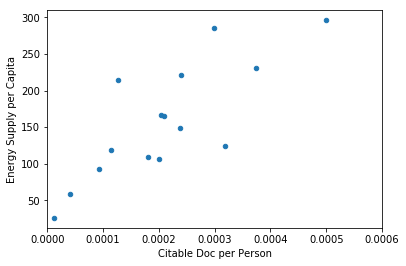

In [107]:
import matplotlib.pyplot as plt
# Question 9
df['Citable Doc per Person'] = df['Citable documents']/df['PopEst']
df[['Citable Doc per Person', 'Energy Supply per Capita']].corr()
df['Energy Supply per Capita']= df['Energy Supply per Capita'].astype('float64')
df.plot(x='Citable Doc per Person', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])


In [108]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Ratio,PopEst,Citable Doc per Person,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.754910,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,0.000093,1
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.570980,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,0.000298,0
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.232820,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,0.000238,0
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.600470,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,0.000319,0
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.288680,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,0.000128,1
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296.0,61.945430,...,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.523986e+07,0.000500,1
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165.0,17.901530,...,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.036970e+07,0.000209,1
India,8,15005,14841,128763,37209,8.58,115,33195000000,26.0,14.969080,...,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.276731e+09,0.000012,0
France,9,13153,12973,130632,28601,9.93,114,10597000000,166.0,17.020280,...,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.383735e+07,0.000203,1


In [109]:
#Question 10
l = list()
MV= df['% Renewable'].median()
for x in df['% Renewable']:
    if x >= MV:
        l.append('1')
    else:
        l.append('0')
df['HighRenew'] = l
HighRenew = df[['Rank','HighRenew']].join(ScimEn, on='Rank',rsuffix='ScimEn', sort=True)[['Rank','Country','HighRenew']]
HighRenew= HighRenew.set_index('Country')['HighRenew']
HighRenew

Country
United States         1
Japan                 0
United Kingdom        0
Russian Federation    0
Canada                1
Germany               1
India                 1
France                0
South Korea           1
Italy                 0
Spain                 1
Iran                  1
Australia             0
Brazil                0
Taiwan                1
Name: HighRenew, dtype: object

In [110]:
#df= df.join(ScimEn, on='Rank',how='outer', rsuffix='_right').drop(columns=([
#       'Documents_right', 'Citable documents_right',
#       'Citations_right', 'Self-citations_right',
#       'Citations per document_right', 'H index_right']))#.set_index('Country')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, China to Brazil
Data columns (total 24 columns):
Rank                        15 non-null int64
Documents                   15 non-null int64
Citable documents           15 non-null int64
Citations                   15 non-null int64
Self-citations              15 non-null int64
Citations per document      15 non-null float64
H index                     15 non-null int64
Energy Supply               15 non-null object
Energy Supply per Capita    15 non-null float64
% Renewable                 15 non-null float64
2006                        15 non-null float64
2007                        15 non-null float64
2008                        15 non-null float64
2009                        15 non-null float64
2010                        15 non-null float64
2011                        15 non-null float64
2012                        15 non-null float64
2013                        15 non-null float64
2014                        15 non-null flo

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, China to Brazil
Data columns (total 24 columns):
Rank                        15 non-null int64
Documents                   15 non-null int64
Citable documents           15 non-null int64
Citations                   15 non-null int64
Self-citations              15 non-null int64
Citations per document      15 non-null float64
H index                     15 non-null int64
Energy Supply               15 non-null object
Energy Supply per Capita    15 non-null float64
% Renewable                 15 non-null float64
2006                        15 non-null float64
2007                        15 non-null float64
2008                        15 non-null float64
2009                        15 non-null float64
2010                        15 non-null float64
2011                        15 non-null float64
2012                        15 non-null float64
2013                        15 non-null float64
2014                        15 non-null flo

In [112]:
#Question 11
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
ContinentDict['China']

cont_list = []
for x in df.index:
    cont_list.append(ContinentDict[x])
df['Continent'] = cont_list
df2 = df.groupby('Continent')['PopEst'].agg({"size": np.size,"sum": np.sum, "mean": np.mean, "std":np.std})
df2

'Asia'

In [124]:
#Question 12
df['Bins %Ren'] = pd.cut(x=df['% Renewable'], bins=5)
df.groupby(by=['Continent', 'Bins %Ren']).size()

Continent      Bins %Ren       
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [126]:
df[['% Renewable', 'Bins %Ren']]

,% Renewable,Bins %Ren
Country,,
China,19.754910,"(15.753, 29.227]"
United States,11.570980,"(2.212, 15.753]"
Japan,10.232820,"(2.212, 15.753]"
United Kingdom,10.600470,"(2.212, 15.753]"
Russian Federation,17.288680,"(15.753, 29.227]"
Canada,61.945430,"(56.174, 69.648]"
Germany,17.901530,"(15.753, 29.227]"
India,14.969080,"(2.212, 15.753]"
France,17.020280,"(15.753, 29.227]"


In [128]:
df['Bins %Ren'].unique()

[(15.753, 29.227], (2.212, 15.753], (56.174, 69.648], (29.227, 42.701]]
Categories (4, interval[float64]): [(2.212, 15.753] < (15.753, 29.227] < (29.227, 42.701] < (56.174, 69.648]]

In [140]:
#Question 13
st = df['PopEst'].apply(lambda x:format(x,',')).to_string(index=False)
print(st)

Country
 1,367,645,161.2903225
  317,615,384.61538464
  127,409,395.97315437
  63,870,967.741935484
         143,500,000.0
   35,239,864.86486486
   80,369,696.96969697
 1,276,730,769.2307692
   63,837,349.39759036
  49,805,429.864253394
  59,908,256.880733944
    46,443,396.2264151
   77,075,630.25210084
  23,316,017.316017315
  205,915,254.23728815


In [176]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = df
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


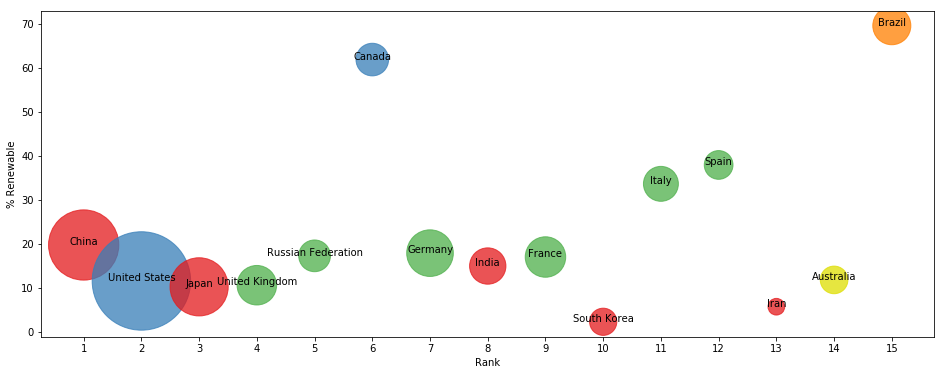

In [177]:
plot_optional()

In [166]:
for i, txt in enumerate(df.index):
    print(txt)

China
United States
Japan
United Kingdom
Russian Federation
Canada
Germany
India
France
South Korea
Italy
Spain
Iran
Australia
Brazil
